In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, GlobalMaxPooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data_dir = '/content/drive/MyDrive/cursoUPV/Nivel_Basico_Desarrollo_Pokedex/dataset'

train_datagen = ImageDataGenerator(
    rotation_range = 15, 
    width_shift_range = 0.1, 
    height_shift_range = 0.1, 
    zoom_range = 0.1, 
    horizontal_flip = True,
    rescale = 1/255,
    validation_split = 0.2)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    # target_size = (256, 256),
    batch_size = 32,
    subset='training')

val_generator = train_datagen.flow_from_directory(
    train_data_dir,
    # target_size = (256, 256),
    batch_size = 32,
    subset='validation')


Found 937 images belonging to 5 classes.
Found 230 images belonging to 5 classes.


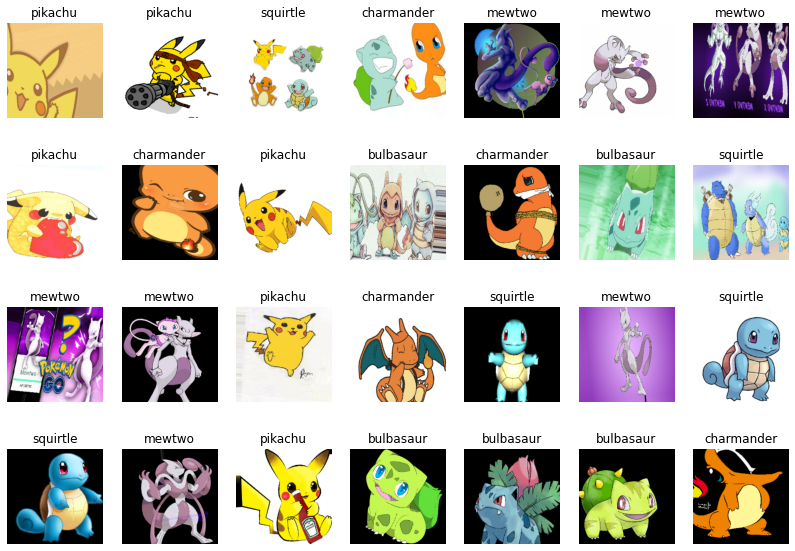

In [ ]:
class_names = list(train_generator.class_indices.keys())

x_train, y_train = train_generator.next()

fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = x_train[n]
    plt.imshow(img)
    plt.title(class_names[y_train[n].argmax(axis=0)])
    plt.axis('off')

In [ ]:
def build_CNN(dropout=False, batch_norm=False):

  model = Sequential()

  model.add(Input(shape=(256,256,3)))

  # 1st convolutional block
  model.add(Conv2D(
      filters = 32, 
      kernel_size = 3, 
      padding = 'same',
      activation = 'relu',
      ))
  
  # if batch_norm:
  #   model.add(BatchNormalization())

  model.add(MaxPooling2D())
  
  # if dropout:
  #   model.add(Dropout(dropout))

  # 2nd convolutional block
  for i in range(2):
    model.add(Conv2D(
        filters = 64, 
        kernel_size = 3, 
        padding = 'same',
        activation = 'relu',
        ))

  # if batch_norm:
  #   model.add(BatchNormalization())

  model.add(MaxPooling2D())
  
  # if dropout:
  #   model.add(Dropout(dropout))

  # 3rd convolutional block
  for i in range(2):
    model.add(Conv2D(
        filters = 128, 
        kernel_size = 3, 
        padding = 'same',
        activation = 'relu',
        ))

  if batch_norm:
    model.add(BatchNormalization())
  
  model.add(GlobalMaxPooling2D())
  
  if dropout:
    model.add(Dropout(dropout))
  
  model.add(Dense(5, activation='softmax'))

  return model

In [ ]:
model = build_CNN(dropout=0.2, batch_norm=True)
model.compile(
    optimizer = Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']) 

Epoch 1/50
10/30 [=========>....................] - ETA: 25s - loss: 2.1442 - accuracy: 0.2625

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 [==============================] - 54s 2s/step - loss: 1.5865 - accuracy: 0.3821 - val_loss: 1.5171 - val_accuracy: 0.6391
Epoch 2/50
30/30 [==============================] - 50s 2s/step - loss: 0.7749 - accuracy: 0.6894 - val_loss: 1.4306 - val_accuracy: 0.6609
Epoch 3/50
30/30 [==============================] - 52s 2s/step - loss: 0.5832 - accuracy: 0.7791 - val_loss: 1.3108 - val_accuracy: 0.8826
Epoch 4/50
30/30 [==============================] - 51s 2s/step - loss: 0.5035 - accuracy: 0.8271 - val_loss: 1.1907 - val_accuracy: 0.8565
Epoch 5/50
30/30 [==============================] - 49s 2s/step - loss: 0.4486 - accuracy: 0.8346 - val_loss: 1.1555 - val_accuracy: 0.8565
Epoch 6/50
30/30 [==============================] - 52s 2s/step - loss: 0.3822 - accuracy: 0.8677 - val_loss: 1.0963 - val_accuracy: 0.9043
Epoch 7/50
30/30 [==============================] - 52s 2s/step - loss: 0.3748 - accuracy: 0.8655 - val_loss: 1.0830 - val_accuracy: 0.9000
Epoch 8/50
30/30 [=============

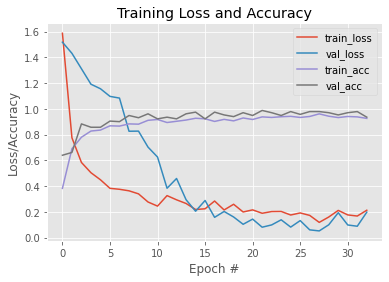

In [ ]:
epochs = 50

H = model.fit(
    x = train_generator, 
    validation_data = val_generator, 
    epochs = epochs,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
    )

plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(len(H.history["loss"])), H.history["loss"], label="train_loss")
plt.plot(np.arange(len(H.history["val_loss"])), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(len(H.history["accuracy"])), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(len(H.history["val_accuracy"])), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

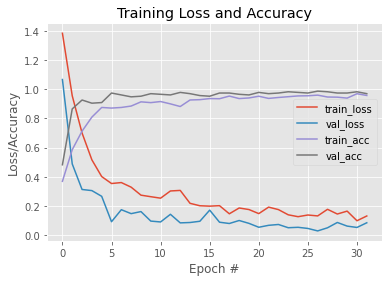

In [ ]:
!ls /content/drive/MyDrive/cursoUPV/Nivel_Basico_Desarrollo_Pokedex/examples

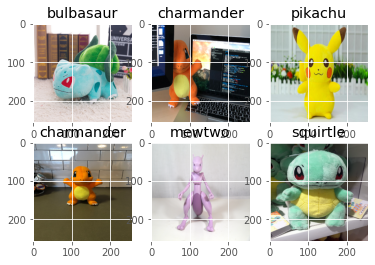

In [ ]:
test_data_dir = '/content/drive/MyDrive/cursoUPV/Nivel_Basico_Desarrollo_Pokedex/examples/'

image_names = [
  'bulbasaur_plush.png',
  'charmander_hidden.png',
  'pikachu_toy.png',
  'charmander_counter.png',
  'mewtwo_toy.png',
  'squirtle_plush.png',
  ]

image_paths = [test_data_dir + name for name in image_names]

images = [cv2.resize(cv2.cvtColor(cv2.imread(path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)/255, (256, 256)) for path in image_paths]

labels = [
  'bulbasaur',
  'charmander',
  'pikachu',
  'charmander',
  'mewtwo',
  'squirtle',
]

fig = plt.figure()
for i, (image, label) in enumerate(zip(images, labels)):
  fig.add_subplot(2, 3, i+1)
  plt.title(label)
  plt.imshow(image)

In [ ]:
x_test = np.array(images)

y_test = np.array([train_generator.class_indices[label] for label in labels])
y_test = to_categorical(y_test)

predictions = model.predict(x_test)

for prediction in predictions:
  print(list(train_generator.class_indices.keys())[np.argmax(prediction)])

1/1 [==============================] - 0s 96ms/step
bulbasaur
charmander
pikachu
charmander
mewtwo
squirtle


In [ ]:
predictions.shape